In [1]:
# Importing Packages

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
from __future__ import print_function
 

In [2]:
# Importing Dataset

mnist = datasets.load_digits()


In [3]:
# Splitting the complete dataset into training and testing dataset (80%/20%)
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
	mnist.target, test_size=0.2, random_state=35)
 
# Taking 10% of the training data for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=59)
 
# Prinitng the size of training, validation and testing dataset
print("Training data points: {}".format(len(trainLabels)))
print("Validation data points: {}".format(len(valLabels)))
print("Testing data points: {}".format(len(testLabels)))


Training data points: 1293
Validation data points: 144
Testing data points: 360


In [4]:
# Initializing K and its respective accuracy values
kVals = range(1, 35, 2)
accuracies = []
 
# Looping the model for different K values
for k in range(1, 35, 2):
	# Training model with K values in loop
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(trainData, trainLabels)
 
	# Accuracy of the models
	score = model.score(valData, valLabels)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
    
# Finding the value of K that has highest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))


k=1, accuracy=97.92%
k=3, accuracy=98.61%
k=5, accuracy=98.61%
k=7, accuracy=97.92%
k=9, accuracy=97.22%
k=11, accuracy=97.22%
k=13, accuracy=96.53%
k=15, accuracy=96.53%
k=17, accuracy=95.83%
k=19, accuracy=95.83%
k=21, accuracy=95.83%
k=23, accuracy=95.83%
k=25, accuracy=94.44%
k=27, accuracy=94.44%
k=29, accuracy=94.44%
k=31, accuracy=94.44%
k=33, accuracy=95.14%
k=3 achieved highest accuracy of 98.61% on validation data


In [5]:
# From the above predictions we can say that GENERALLY as the value of K increases the accuracy decreases expect for k=3.

# Retraining the model with the most optimum value of K
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# Final Predictions
print("Predictions on testing Data")
print(classification_report(testLabels, predictions))


Predictions on testing Data
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        33
          1       0.89      1.00      0.94        32
          2       1.00      1.00      1.00        32
          3       0.97      0.97      0.97        36
          4       1.00      0.92      0.96        37
          5       1.00      0.97      0.99        39
          6       1.00      1.00      1.00        39
          7       0.95      1.00      0.97        38
          8       0.90      0.87      0.89        31
          9       0.98      0.95      0.96        43

avg / total       0.97      0.97      0.97       360



In [6]:
# Building a classifier using GridSearchCV-
# Import Statements-
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
knn = KNeighborsClassifier()
k_range = range(1, 30)
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')


In [8]:
# Fitting the model on train data-
grid.fit(trainData, trainLabels)
grid.grid_scores_
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)


{'n_neighbors': 1}
[1.         1.         0.98496241 0.98473282 0.98449612 0.9921875
 0.99206349 0.98412698 0.98412698 0.976     ]
0.988399071925754


/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packag

In [9]:
# Printing mean scores-
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
grid_mean_scores


/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[0.988399071925754,
 0.988399071925754,
 0.9891724671307038,
 0.9868522815158546,
 0.9899458623356535,
 0.9876256767208044,
 0.9899458623356535,
 0.9876256767208044,
 0.9860788863109049,
 0.9837587006960556,
 0.982985305491106,
 0.9814385150812065,
 0.9814385150812065,
 0.9775715390564579,
 0.9760247486465584,
 0.9775715390564579,
 0.974477958236659,
 0.97138437741686,
 0.97138437741686,
 0.9698375870069605,
 0.9675174013921114,
 0.9667440061871616,
 0.9675174013921114,
 0.9682907965970611,
 0.9651972157772621,
 0.9667440061871616,
 0.9651972157772621,
 0.9644238205723125,
 0.9651972157772621]

Text(0,0.5,'Cross Validation Accuracy')

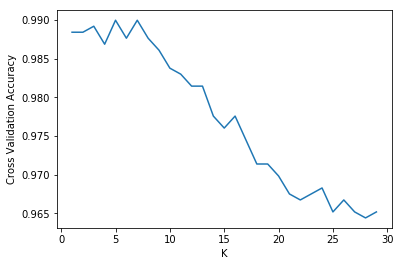

In [10]:
# Plots-
plt.plot(k_range, grid_mean_scores)
plt.xlabel('K')
plt.ylabel('Cross Validation Accuracy')


In [11]:
# Extracting the necessary values
grid.best_score_
grid.best_params_
grid.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
# Fitting the model on testing data-
grid.fit(testData, testLabels)
grid.grid_scores_
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[0.97560976 0.95       0.94736842 0.97222222 0.94444444 0.97222222
 1.         0.97058824 0.96969697 0.96774194]
0.9666666666666667


/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packag

In [13]:
# Printing mean scores-
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
grid_mean_scores


/Users/pranavjaipurkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[0.9666666666666667,
 0.9527777777777777,
 0.9638888888888889,
 0.9472222222222222,
 0.9388888888888889,
 0.9388888888888889,
 0.9333333333333333,
 0.9222222222222223,
 0.9222222222222223,
 0.9194444444444444,
 0.9277777777777778,
 0.9166666666666666,
 0.9194444444444444,
 0.9111111111111111,
 0.9083333333333333,
 0.9055555555555556,
 0.9055555555555556,
 0.8972222222222223,
 0.9027777777777778,
 0.9055555555555556,
 0.9,
 0.9138888888888889,
 0.9027777777777778,
 0.9027777777777778,
 0.8972222222222223,
 0.9027777777777778,
 0.9055555555555556,
 0.9027777777777778,
 0.9055555555555556]

Text(0,0.5,'Cross Validation Accuracy')

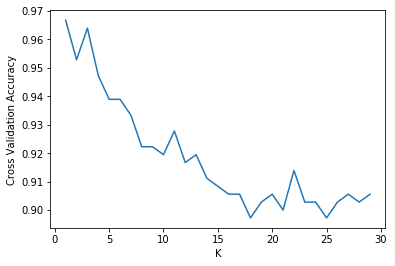

In [14]:
# Plots-
plt.plot(k_range, grid_mean_scores)
plt.xlabel('K')
plt.ylabel('Cross Validation Accuracy')

In [15]:
# Extracting the necessary values
grid.best_score_
grid.best_params_
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
# As we see the highest value of Cross Validation Accuracy occurs for K=1, but K=1 would create a huge number of clusters hence we would take K = 3.

In [18]:
# Retraining the model with the most optimum value of K
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# Final Predictions
print("Predictions on testing Data")
print(classification_report(testLabels, predictions))

Predictions on testing Data
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        33
          1       0.89      1.00      0.94        32
          2       1.00      1.00      1.00        32
          3       0.97      0.97      0.97        36
          4       1.00      0.92      0.96        37
          5       1.00      0.97      0.99        39
          6       1.00      1.00      1.00        39
          7       0.95      1.00      0.97        38
          8       0.90      0.87      0.89        31
          9       0.98      0.95      0.96        43

avg / total       0.97      0.97      0.97       360

